## Exploratory Data Analysis (EDA)

In [145]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

### Data Attributes
- overall - rating of the product
- verified
- reviewTime - time of the review (raw)
- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714 or 0001713353
- style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
- reviewerName - name of the reviewer
- reviewText - text of the review
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- vote - helpful votes of the review
- image - images that users post after they have received the product

Search product from `Amazon.com` website, e.g. 0001713353.  Then, sort review by "Most recent" and look for reviewTime.

### Import data in JSON and fix column names
- Use only 1000 lines for now

In [371]:
json_file_name = 'Books_5_1000_lines.json'

df = pd.read_json('../data/' + json_file_name, lines=True)

df.columns = ['overall', 'verified', 'review_time', 'reviewer_id', \
              'asin', 'style', 'reviewer_name', 'review_text', \
               'summary', 'unix_review_time', 'vote', 'image']
df.head()

,overall,verified,review_time,reviewer_id,asin,style,reviewer_name,review_text,summary,unix_review_time,vote,image
0,5,False,"03 30, 2005",A1REUF3A1YCPHM,1713353,{'Format:': ' Hardcover'},TW Ervin II,"The King, the Mice and the Cheese by Nancy Gur...",A story children will love and learn from,1112140800,NaN,NaN
1,5,True,"06 20, 2016",AVP0HXC9FG790,1713353,NaN,Amazon Customer,The kids loved it!,Five Stars,1466380800,NaN,NaN
2,5,True,"01 24, 2016",A324TTUBKTN73A,1713353,{'Format:': ' Paperback'},Tekla Borner,My students (3 & 4 year olds) loved this book!...,Five Stars,1453593600,NaN,NaN
3,5,False,"07 9, 2015",A2RE7WG349NV5D,1713353,{'Format:': ' Paperback'},Deborah K Woroniecki,LOVE IT,Five Stars,1436400000,NaN,NaN
4,5,True,"01 18, 2015",A32B7QIUDQCD0E,1713353,NaN,E,Great!,Five Stars,1421539200,NaN,NaN


In [151]:
df.shape

(1000, 12)

### Histogram of Product Ratings - `overall`
- Most product ratings are 5 stars

In [152]:
df.overall.value_counts().sort_index()

1     50
2     29
3     90
4    124
5    707
Name: overall, dtype: int64

In [153]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

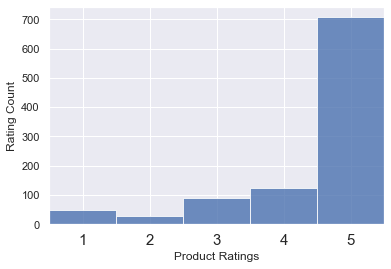

In [154]:
bins = range(1, df.overall.max()+2)
plt.hist(df.overall, bins=bins, alpha=0.8)
bins_labels(bins, fontsize=15)
plt.xlabel('Product Ratings')
plt.ylabel('Rating Count')
plt.show()

### Histogram of `verified`
- Sizable portion of not verified
- If thrown away, lose 25% of data

In [247]:
df.verified.value_counts()

True     768
False    232
Name: verified, dtype: int64

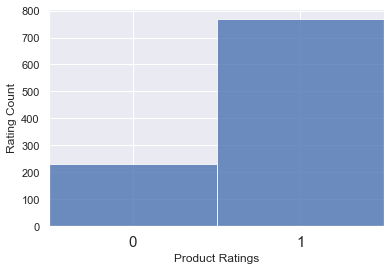

In [246]:
bins = range(df.verified.astype(int).max()+2)
plt.hist(df.verified.astype(int), bins=bins, alpha=0.8)
bins_labels(bins, fontsize=15)
plt.xlabel('Product Ratings')
plt.ylabel('Rating Count')
plt.show()

### Convert `review_time` to `datetime`

In [168]:
df[['review_time']].head()

,review_time
0,"03 30, 2005"
1,"06 20, 2016"
2,"01 24, 2016"
3,"07 9, 2015"
4,"01 18, 2015"


In [169]:
df[['review_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_time  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [170]:
df['review_time'] = pd.to_datetime(df['review_time'], format='%m %d, %Y')

In [171]:
df[['review_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_time  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [174]:
df['review_time'].head()

0   2005-03-30
1   2016-06-20
2   2016-01-24
3   2015-07-09
4   2015-01-18
Name: review_time, dtype: datetime64[ns]

In [172]:
df['review_time'].dt.month_name()[:5]

0      March
1       June
2    January
3       July
4    January
Name: review_time, dtype: object

### Distributin of Review Time
- Only day, month, year
- No time of day (hour, minute)

**Review by Year**

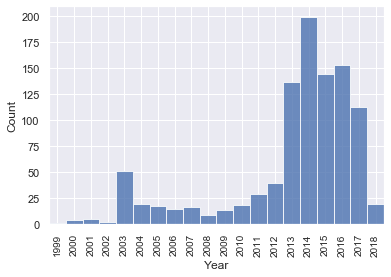

In [209]:
bins = range(df.review_time.dt.year.min(), df.review_time.dt.year.max()+2)
plt.hist(df.review_time.dt.year, bins=bins, alpha=0.8)
bins_labels(bins, fontsize=10)
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**<center>Compare with AMZN stock prices taking off in 2013</center>**
<img src="img/amzn.jpg" style="width:600px;height:300px"/>

**Review by Month**
- Correspond to Christmas & New Year holidays

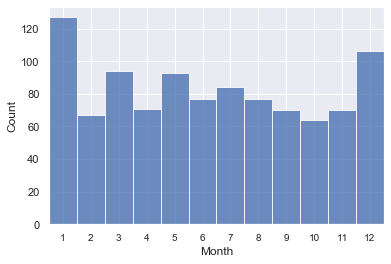

In [232]:
bins = range(1, df.review_time.dt.month.max()+2)
plt.hist(df.review_time.dt.month, bins=bins, alpha=0.8)
bins_labels(bins, fontsize=10)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### Check Null Values for these fields - MUST check full dataset
- overall - No missing values
- asin (Product ID) - No missing values
- summary (May need it for NLP improvement) - Missing values = 27164983-27157177 = 7,806 out of 27 millions
- review_text (May need it for NLP improvement) - Missing values = 27164983-27161262 = 3,721 out of 27 millions

**For the first 1000 lines**

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   overall           1000 non-null   int64         
 1   verified          1000 non-null   bool          
 2   review_time       1000 non-null   datetime64[ns]
 3   reviewer_id       1000 non-null   object        
 4   asin              1000 non-null   int64         
 5   style             964 non-null    object        
 6   reviewer_name     1000 non-null   object        
 7   review_text       1000 non-null   object        
 8   summary           1000 non-null   object        
 9   unix_review_time  1000 non-null   int64         
 10  vote              160 non-null    float64       
 11  image             3 non-null      object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 87.0+ KB


### Check full dataset using `chunksize`
- Count total lines of not null
- Compare with total lines
<br><br>
- File size = 20.8 GB
- Total number of lines = 27,164,983

### Validate product reviews `overall` contains only 1, 2, 3, 4, and 5
- Use set()
- There are 3 product reviews = 0 (out of 27 millions); Delete them

In [381]:
#json_file_name = 'Books_5_1000_lines.json'
#chunk=10

json_file_name = 'Books_5.json'
chunk = 1000000

count_overall = count_asin = count_summary = count_review_text = 0
count_total = 0
set_overall = set()

df_full = pd.read_json('../data/' + json_file_name, lines=True, chunksize=chunk)
df_full

In [382]:
import time

print(f'Start time = {time.ctime()}')

for chunk in df_full:
    print(f'Processing {count_total}')
    count_total += len(chunk)
    
    if 'overall' in chunk.columns:
        count_overall += len(chunk[chunk.overall.notnull()])
        
        member = set(pd.unique(chunk.overall).flatten())
        set_overall = set_overall.union(member)
        
    if 'asin' in chunk.columns:
        count_asin += len(chunk[chunk.asin.notnull()])
        
    if 'summary' in chunk.columns:
        count_summary += len(chunk[chunk.summary.notnull()])
        
    if 'reviewText' in chunk.columns:
        count_review_text += len(chunk[chunk.reviewText.notnull()])

print(f'Completion time = {time.ctime()}')

Start time = Tue Mar 17 20:41:46 2020
Processing 0
Processing 1000000
Processing 2000000
Processing 3000000
Processing 4000000
Processing 5000000
Processing 6000000
Processing 7000000
Processing 8000000
Processing 9000000
Processing 10000000
Processing 11000000
Processing 12000000
Processing 13000000
Processing 14000000
Processing 15000000
Processing 16000000
Processing 17000000
Processing 18000000
Processing 19000000
Processing 20000000
Processing 21000000
Processing 22000000
Processing 23000000
Processing 24000000
Processing 25000000
Processing 26000000
Processing 27000000
Completion time = Tue Mar 17 20:51:00 2020


In [383]:
count_overall, count_asin, count_summary, count_review_text, count_total

(27164983, 27164983, 27157177, 27161262, 27164983)

**Missing values of `summary`**
- 7806

In [323]:
27164983-27157177

7806

**Missing values of `review_text`**
- 3721

In [324]:
27164983-27161262

3721

### All possible values of product rating `overall`
- There is 0 product rating

In [384]:
set_overall

{0, 1, 2, 3, 4, 5}

### Profile product ratings
- Only 3 production rating = 0; Delete them when run the model with full dataset

In [423]:
#json_file_name = 'Books_5_1000_lines.json'
#chunk=10

json_file_name = 'Books_5.json'
chunk = 1000000

df_profile_rating = pd.read_json('../data/' + json_file_name, lines=True, chunksize=chunk)
df_profile_rating

In [424]:
import time

print(f'Start time = {time.ctime()}')
count_total = 0
rating_dict = {}

for chunk in df_profile_rating:
    print(f'Processing {count_total}')
    count_total += len(chunk)
    
    if 'overall' in chunk.columns:
        
        rating_new = chunk.overall.to_numpy()
        unique, counts = np.unique(rating_new, return_counts=True)
        rating_new = dict(zip(unique, counts))
        
        rating_dict = {k: rating_dict.get(k, 0) + rating_new.get(k, 0) \
                           for k in set(rating_dict) | set(rating_new)}
        
print(f'Completion time = {time.ctime()}')

Start time = Tue Mar 17 21:18:01 2020
Processing 0
Processing 1000000
Processing 2000000
Processing 3000000
Processing 4000000
Processing 5000000
Processing 6000000
Processing 7000000
Processing 8000000
Processing 9000000
Processing 10000000
Processing 11000000
Processing 12000000
Processing 13000000
Processing 14000000
Processing 15000000
Processing 16000000
Processing 17000000
Processing 18000000
Processing 19000000
Processing 20000000
Processing 21000000
Processing 22000000
Processing 23000000
Processing 24000000
Processing 25000000
Processing 26000000
Processing 27000000
Completion time = Tue Mar 17 21:27:11 2020


In [431]:
rating_dict

{0: 3, 1: 827009, 2: 1007526, 3: 2380914, 4: 5906676, 5: 17042855}

### Plot Product Review of full dataset

In [432]:
rating_lists = sorted(rating_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*rating_lists) # unpack a list of pairs into two tuples

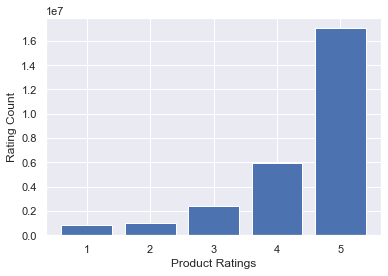

In [437]:
plt.bar(x[1:], y[1:], align='center')
plt.xticks(x[1:])
plt.xlabel('Product Ratings')
plt.ylabel('Rating Count')
plt.show()